In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

Mounted at /content/gdrive/
--> Dataset.....
  Equipment/ Other Sub equipment (if applicable)              Down time issue  \
0           Sleeve                         Mould  water leakage from spt side   
1           Sleeve                         Mould  water leakage from spt side   
2              MTC                           ccm            m/c under to mech   
3              Mtc                           Mtc             gland tightning    
4      Core loader                   Core loader  Core loader centering prob    

  Machine/ process stop time Machine/ process start time  \
0                   20:57:00                    21:42:00   
1                   19:38:00         1900-01-01 00:18:00   
2                   11:45:00                    12:50:00   
3                   23:00:00         1900-01-01 00:00:00   
4        1900-01-01 00:00:00         1900-01-01 00:15:00   

   Time taken (Duration) Type ( B/D,PM,SC,Process Attended by - department  \
0               0.750000     

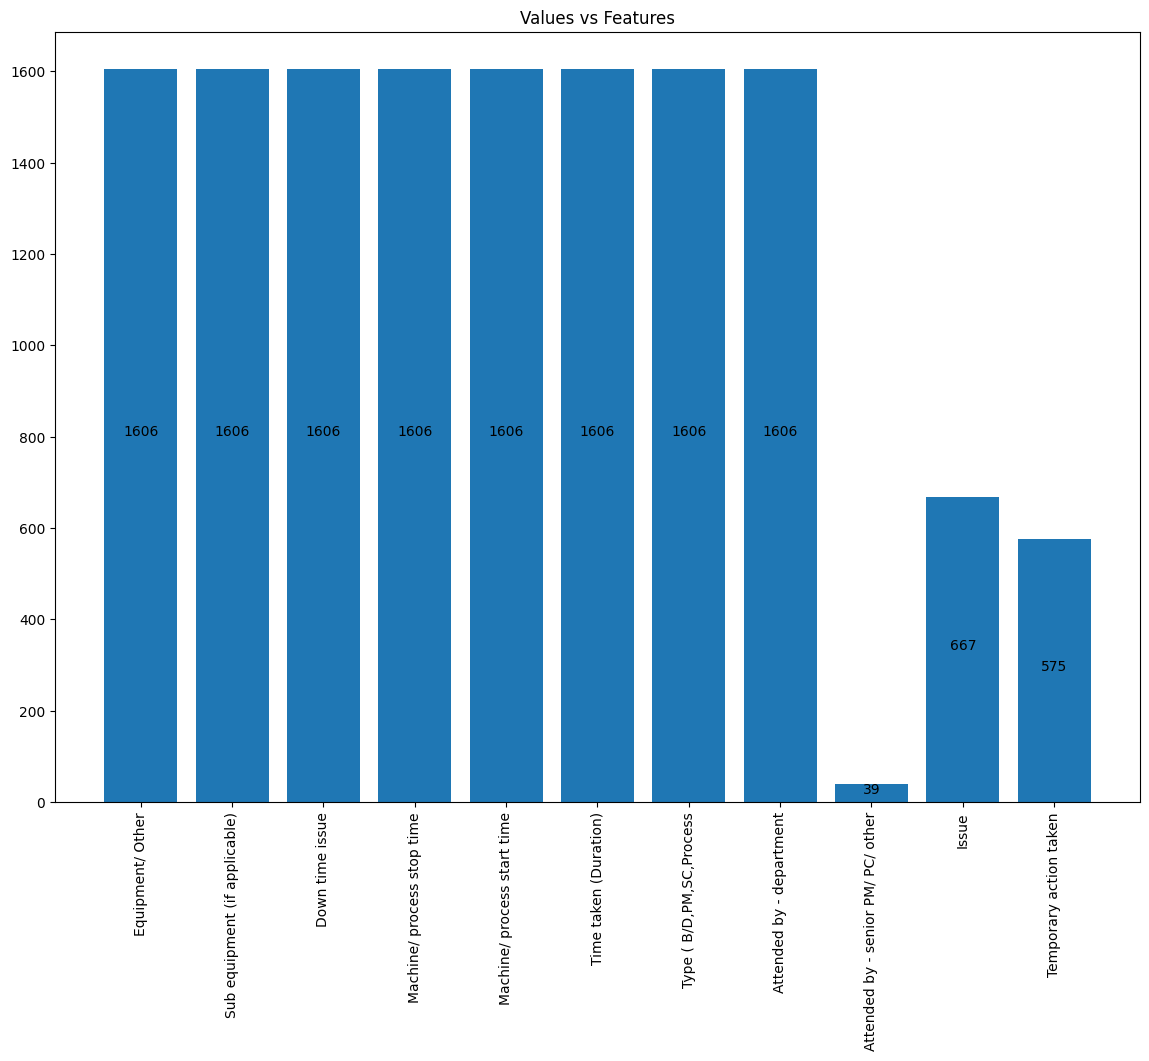




Nuber of non-null values
Index(['Equipment/ Other', 'Sub equipment (if applicable)', 'Down time issue',
       'Machine/ process stop time', 'Machine/ process start time',
       'Time taken (Duration)', 'Type ( B/D,PM,SC,Process',
       'Attended by - department', 'Attended by - senior PM/ PC/ other',
       'Issue', 'Temporary action taken'],
      dtype='object')



--> Dataset shape (rowsXcolumns)
(1609, 11)



--> Number of unique values
Equipment/ Other                       97
Sub equipment (if applicable)          97
Down time issue                       740
Machine/ process stop time            738
Machine/ process start time           769
Time taken (Duration)                 497
Type ( B/D,PM,SC,Process                4
Attended by - department               10
Attended by - senior PM/ PC/ other      8
Issue                                 466
Temporary action taken                442
dtype: int64





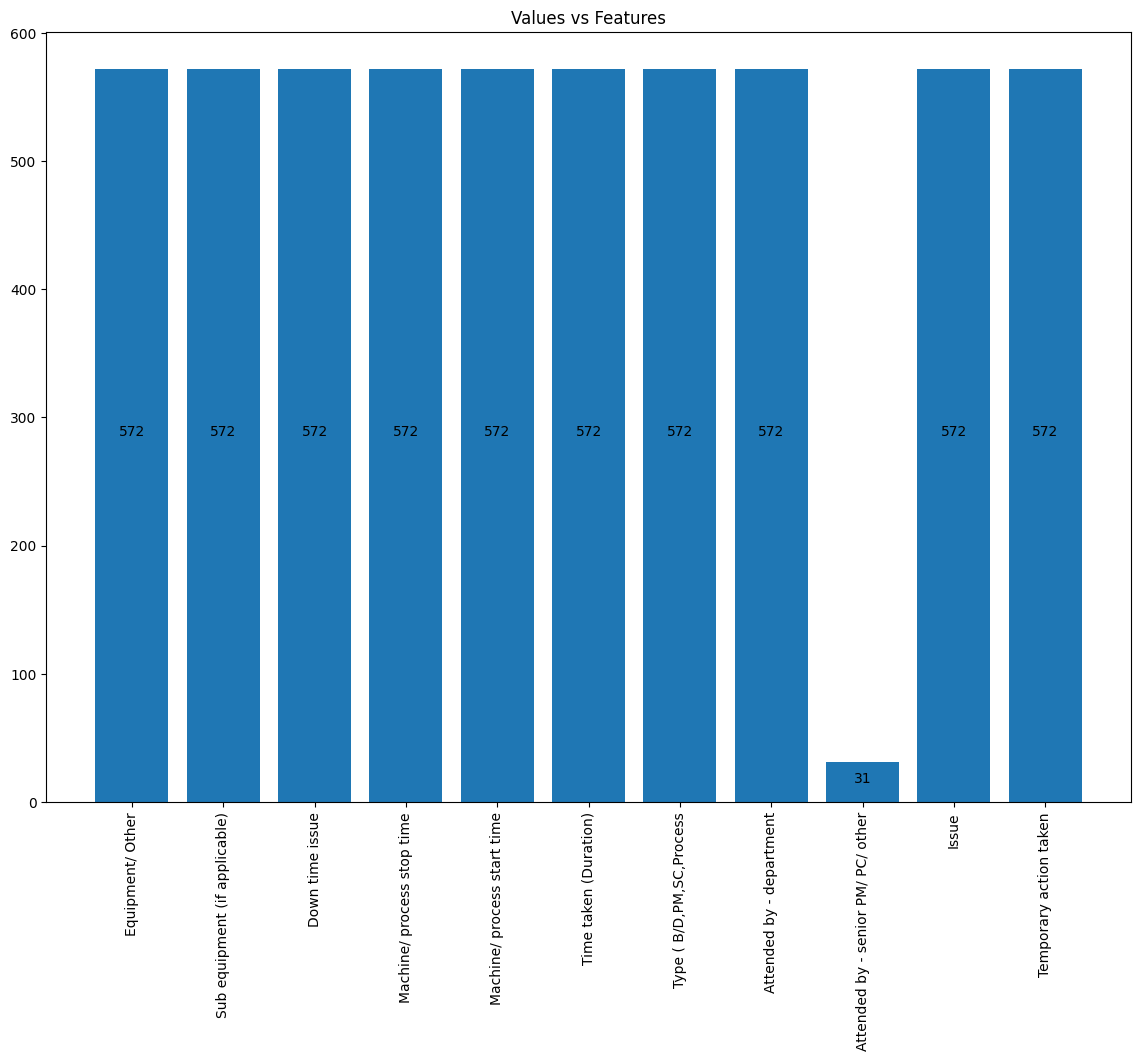

In [ ]:
#dir_path="Downtime Logs Casting.xlsx"
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

dir_path="//content//gdrive//MyDrive//Projects//MTP-I//Downtime Logs Casting.xlsx"
dataset=pd.read_excel(dir_path, sheet_name='Mech')

print("--> Dataset.....")
print(dataset.head())

#dataset.columns=dataset.values[0]

#dataset.drop(0, inplace=True)
print("--> Dataset shape (rowsXcolumns)")
print(dataset.shape)
print("\n\n")

dataset=dataset[dataset.columns[0:11]]


print("--> Dataset shape (rowsXcolumns)")
print(dataset.shape)
print("\n\n")

print("--> Dataset information")
print(dataset.info())
print("\n\n")

print("Total number of NULL values")
print(dataset.isnull().sum())
print("\n\n")


def add_labels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2,y[i], ha='center')

plt.figure(figsize=(14,10))
plt.bar(dataset.notnull().sum().index, dataset.notnull().sum().values)
plt.title("Values vs Features")
plt.xticks(rotation='vertical')
add_labels(dataset.notnull().sum().index, dataset.notnull().sum().values)
plt.show()

print("\n\n")
print("Nuber of non-null values")
print(dataset.notnull().sum().index)
print("\n\n")
# the number of issues present - 667 out of 1606 data values
# the number of temporary action taken - 575
# No of issues where indusrty expert attended to solve it - 39
print("--> Dataset shape (rowsXcolumns)")
print(dataset.shape)
print("\n\n")

print("--> Number of unique values")
print(dataset.nunique())
print("\n\n")

"""# Removing rows which do not have issues and actions"""

dataset.dropna(subset=["Issue","Temporary action taken"], inplace=True)

dataset.reset_index(inplace=True, drop=True)

def add_labels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2,y[i], ha='center')

plt.figure(figsize=(14,10))
plt.bar(dataset.notnull().sum().index, dataset.notnull().sum().values)
plt.title("Values vs Features")
plt.xticks(rotation='vertical')
add_labels(dataset.notnull().sum().index, dataset.notnull().sum().values)
plt.show()

In [ ]:
# the number of issues present - 667 out of 1606 data values (Non NULL)
# the number of temporary action taken - 575 (Non NULL)
# Total number of issues with the solutions = 572 issues and respective solutions (Removing if there is no issue and solution present)

# Objective: Estimation of temporary action given the mechanical issue

Feature Engineering



In [ ]:
# Feature selection
# For the time being to generate the temporary action given an issue, consider equipment, sub equipment, downtime issue
# issue and temporary action - To predict the action these features will have significant impact

columns=dataset.columns

final_dataset=dataset[[columns[0], columns[1], columns[2], columns[9], columns[10]]]

final_columns=final_dataset.columns

In [ ]:
new_column_names={"Equipment/ Other":"Equipment", "Sub equipment (if applicable)":"SubEquipment","Down time issue":"Down Time Issue", "Issue":"Issue", "Temporary action taken":"Action"}
final_dataset = final_dataset.rename(columns=new_column_names)
final_columns=final_dataset.columns

In [ ]:
'''
column_to_move = final_dataset.pop("Down Time Issue")

# insert column with insert(location, column_name, column_value)

final_dataset.insert(3, "Down Time Issue", column_to_move)
'''

'\ncolumn_to_move = final_dataset.pop("Down Time Issue")\n\n# insert column with insert(location, column_name, column_value)\n\nfinal_dataset.insert(3, "Down Time Issue", column_to_move)\n'

In [ ]:
final_dataset

,Equipment,SubEquipment,Down Time Issue,Issue,Action
0,Sleeve,Mould,water leakage from spt side,Spt seal got damage as metal got inside resulting in huge water leakage,Spt seal changed
1,Sleeve,Mould,water leakage from spt side,Huge water leakage from spt taper plate gap in bottom,Spt taper plate bolts hole thread were tapped and tightly fitted with new bolts.
2,MTC,ccm,m/c under to mech,oil leakage from mtc gland,in mtc gland packing was given and mounting bolts were made tight
3,Mtc,Mtc,gland tightning,mtc gland leakage + m/c automatically getting down,mtc gland made tight
4,Mtc,Mtc,Mtc prob,casting time variation + m/c automatically getting down,mtc gland made tight + Sleeve changed
...,...,...,...,...,...
567,Diabola,Diabola,Diabola rail out & diabola wheel damage,Diabola Trolley B-Side V roller bearing damage,Roller changed
568,Extractor,Extractor,Extractor not clossing & back stopper broken,Extractor Stopper got out from hinge and plate got bend due to Extractor getting back in Jaw Open Position had impact with Stopper Plate,Plate made strainght and stopper height decreased by 10mm. OK in trial
569,Diabola,Diabola,Diabola derail,Diabola Trolley A-Side V-Wheel Derailed due to Jamming,V-Wheel Changed after putting the trolley back on track
570,Trough,Trough,A side tilting hose damage,A-Side Trough Tilting Hose Burst,Hose Changed


# Fault Taxonomy

In [ ]:
grouped_dataset=final_dataset.groupby(["Equipment", "SubEquipment", "Down Time Issue","Issue","Action"],as_index=False).agg(Action_count=("Action","count"))

In [ ]:
grouped_dataset

,Equipment,SubEquipment,Down Time Issue,Issue,Action,Action_count
0,Accumulator,Accumulator,hydrulic oil leakage from aquimlater cylinder hose,Huge Oil Leakage from MTC stand Accumulator Dummy Fitting as fitting came out while it was tried to tighten as it was loose,Spare fitting was not fitting so Fitting Welded,1
1,CCM,CCM,Spigot metal guard welding,Boggie spt chute fell off,spt chute fitted after cleaning,1
2,CCM,CCM,Under mechanical,Core Loader - Sand Stick on Pipe Face,Core Loader Changed and Aligned. Compression 15mm,1
3,CCM,CCM,bogie wheel adjustment,Sleeve Change (As per Plan),1. Bogie Wheel A-side both wheel packing done (5mm Ring)\n2. All Wheel Ploy Check\n3. Extractor Centering from Bore\n4. MTC Gland Tight,1
4,CCM,CCM,bogie wheel change,Pipe drawn,a side both skt and spt flat wheel with collar replaced,1
...,...,...,...,...,...,...
550,uli unit,uli unit,dry powder uli dropping prob,Dry Powder Feed Problem,Screw Changing work done with lock nut adjusted but not sloved so powder pipe loose nipple position hole decreased by washer welding,1
551,uli unit,uli unit,dry powder uli dropping prob,Dry Powder Feed Problem,Screw feeder pipe line fitted and trial NOT OK so screw check nut adjusted and thread sleeve lock by welding & trial OK,1
552,uli unit,uli unit,dry powder uli dropping prob,Dry Powder pipe hole position metal Jam,Metal Cleaned & trial taken OK,1
553,uli unit,uli unit,dry uli dropping prob,Dry Powder discontinuous Flow,Screw Feeder adjusting Nut adjusted & vibrator changed,1


In [ ]:
temp_dict={}
for index, row in grouped_dataset.iterrows():
    downtime_issue=row['Down Time Issue']
    issue=row["Issue"]
    action=row['Action']
    action_count=row["Action_count"]

    if issue in temp_dict:
        temp_dict[issue].append({'action':action,'action_count':action_count})
    else:
        temp_dict[issue]=[{'action':action,'action_count':action_count}]


In [ ]:
freq_dict={}
for index, row in grouped_dataset.iterrows():
    downtime_issue=row['Down Time Issue']
    issue=row["Issue"]
    if downtime_issue in freq_dict:
        freq_dict[downtime_issue].append({issue: temp_dict[issue]})
    else:
        freq_dict[downtime_issue]=[{issue: temp_dict[issue]}]

In [ ]:
freq_dict

{'hydrulic oil leakage from aquimlater cylinder hose ': [{'Huge Oil Leakage from MTC stand Accumulator Dummy Fitting as fitting came out while it was tried to tighten as it was loose': [{'action': 'Spare fitting was not fitting so Fitting Welded',
     'action_count': 1}]}],
 'Spigot metal guard welding': [{'Boggie spt chute fell off': [{'action': 'spt chute fitted after cleaning',
     'action_count': 1}]}],
 'Under mechanical': [{'Core Loader - Sand Stick on Pipe Face': [{'action': 'Core Loader Changed and Aligned. Compression 15mm',
     'action_count': 1}]}],
 'bogie wheel adjustment ': [{'Sleeve Change (As per Plan)': [{'action': '1. Bogie Wheel A-side both wheel packing done (5mm Ring)\n2. All Wheel Ploy Check\n3. Extractor Centering from Bore\n4. MTC Gland Tight',
     'action_count': 1}]}],
 'bogie wheel change ': [{'Pipe drawn': [{'action': 'a side both skt and spt flat wheel with collar replaced',
     'action_count': 1},
    {'action': 'Sleeve preesing units were checked,sec

In [ ]:
"""
Faults
├──
│   └── CCM
│       ├── Sleeve
│       │   └── Mould
│       │       ├── Huge water leakage from Spigot taper plate gap in bottom
│       │       ├── Spigot seal got damage as metal got inside resulting in huge water leakage
│       │       ├── Water leakage from taper 'o' ring rubber cord
│       │       ├── Mould changed due to Vibration in sleeve no 1
│       │       ├── Water leakage from Spigot seal
│       │       ├── Water leakage from Spigot seal
│       │       ├── Water leakage from taper plate on ring
│       │       ├── Water leakage from Spigot side
│       │       └── Water leakage from Spigot side
│       ├── Mould
│       │   └── Mould pressing roller change
│       ├── Through
│       │   ├── A side trough centering check
│       │   ├── A side trough centering check
│       │   ├── Trough Vibration
│       │   ├── Trough alignment problem
│       │   ├── Clamp plate bolts were missing in b side trough pressing roller guide shaft
│       │   └── B side trough pressing roller was not rotating
│       ├── Diabola
│       │   └── Diabola trolley flat wheel pin bent
│       ├── ULI
│       │   └── Dry ULI tube change
│       └── Core
│           └── Extractor
│               ├── Extractor pipe stopper spring broke
│               ├── Extractor centre out
│               ├── Extractor pipe stopper from base got twisted due to misoperation
│               ├── Extractor centering got out
│               ├── Extractor Center out
│               ├── Extractor Center out
│               ├── Extractor Center out
│               ├── Extractor Center out
│               ├── Extractor center out and guide rod checknut loose
│               └── Extractor Center out
├──
│   └── CCM
│       ├── Generation of drawn pipe
│       ├── Mould
│       │   ├── Water leakage from Spigot side
│       │   └── water leakage from dn 80-150 h/b no 9 v seal
│       ├── Trough
│       │   ├── B side trough centering check
│       │   ├── B side trough vibration
│       │   ├── B side trough pressing roller rotation jam
│       │   ├── Trough centering check & F part cleaning
│       │   ├── Water leakage from dn 80-150 h/b no 9 v seal
│       │   ├── A side trough pressing pneu cylindrical rod got detached from eye
│       │   └── B side trough tilting got jammed
│       ├── Bogie
│       ├── Rail grinding, bogie wheel change
│       ├── Bogie Wheel Change
│       ├── ULI
│       │   └── ULI tube
│       │       ├── Dry powder was not falling onto funnel as pneu vibrator was not working
│       │       ├── Dry powder was not falling onto funnel
│       │       └── Dry ULI tube change
│       ├── Core
│       │   ├── Core burst problem
│       │   ├── Core Loader
│       │   │   ├── Core loader centre out
│       │   │   ├── Socket metal fly
│       │   │   ├── Core loader prob
│       │   │   └── Core burst problem
│       │   └── Extractor/Core Loader
│       │       ├── Pipe slippage from extractor due to hard extraction
│       │       └── Extractor jaws were not closing
│       ├── Crane
│       │   └── C30t crane hoist diversion pulley brg broked and pulley got damage
│       └── PTT
│           └── PTT
│               └── PTT rope got damaged
├──
│   └── CCM
│       ├── M/C under mechanical
│       ├── M/C under mechanical
│       ├── M/C down problem
│       ├── C/B problem
│       ├── Core
│       │   └── Core Loader/Extractor
│       │       ├── Extractor Centering Out
│       │       ├── Extractor Alignment
│       │       ├── Extractor Centering done
│       │       ├── Extractor Centering done
│       │       ├── Extractor jaw close problem
│       │       ├── Extractor jaw close problem
│       │       ├── Extractor change
│       │       └── Extractor centering problem
│       ├── MTC
│       │   ├── MTC change
│       │   └── MTC change
│       ├── Trough
│       │   └── Trough
│       │       ├── A side trough pressing roller change
│       │       ├── Trough centering done
│       │       ├── B side Trough rotating problem
│       │       └── B side Trough tilting problem
│       ├── Scrap trolley
│       │   └── Scrap trolley
│       │       └── Scrap trolley problem
│       ├── Flag gate
│       │   └── Flag gate hydraulic oil leakage
│       ├── ULI
│       │   └── ULI tube
│       │       ├── Dry ULI dropping problem
│       │       ├── Dry ULI dropping problem
│       │       ├── Dry ULI dropping problem
│       │       ├── Dry ULI dropping problem
│       │       └── Dry ULI dropping problem
│       ├── Mould
│       │   └── Mould
│       │       ├── Mould change due to Socket water side leakage
│       │       └── Water leakage from Socket water side
│       └── PTT
│           └── PTT problem
├──
│   └── CCM
│       ├── M/C under mechanical due to drawn pipe removal
│       ├── PTT
│       │   ├── PTT stopped moving
│       │   ├── PTT breakdown
│       │   ├── PTT rope change
│       │   ├── PTT brekadown
│       │   └── PTT rope change
│       ├── Core
│       │   ├── Core wheel assembly change
│       │   ├── Core wheel assembly change
│       │   ├── Core Loader
│       │   │   ├── Socket metal flew away from core loader
│       │   │   ├── Core was not rotating
│       │   │   ├── C/B problem
│       │   │   ├── C/B problem
│       │   │   ├── Core loader centering check
│       │   │   ├── Core loader cylinder brush change
│       │   │   └── Core loader centering done
│       │   ├── Extractor
│       │   │   ├── Due to mounting bolts loose extractor center got out
│       │   │   ├── Extractor stopper plate welding
│       │   │   ├── Extractor stopper plate welding
│       │   │   ├── Extractor stopper broken
│       │   │   └── Extractor jaw clossing prob
│       │   └── Core ring
│       │       ├── Core ring change
│       │       └── Core ring centering change
│       ├── Mould
│       │   ├── Auto run start +s/l up but mould rotation stop
│       │   ├── M/C down before Socket filling
│       │   ├── Mould rotation jam
│       │   ├── Mould rotation problem
│       │   ├── Water leakage from Spigot side
│       │   ├── Mould sleeve open out
│       │   └── Water leakage from Spigot side
│       ├── Trough
│       │   ├── A side trough supporting roller jam
│       │   ├── B side trough pressing roller change
│       │   ├── Trough alignment
│       │   ├── Trough centering done
│       │   └── Trough shifting lock pin welding
│       ├── MTC
│       │   ├── MTC bracket problem
│       │   ├── MTC bracket broken
│       │   ├── MTC bracket broken
│       │   └── MTC gland packing change
│       └── ULI
│           └── ULI tube
│               └── Dry ULI dropping problem
├──
│   └── CCM
│       ├── Pipe stopper pin opened
│       ├── M/C full up during casting time
│       ├── ULI
│       │   └── ULI tube
│       │       ├── Dry ULI dropping problem
│       │       └── Dry ULI dropping problem
│       ├── Mould
│       │   └── Mould
│       │       ├── Water leakage from Spigot side
│       │       ├── Water leakage from Spigot side
│       │       └── Water leakage from Spigot side
│       ├── MTC
│       │   ├── MTC change
│       │   └── MTC problem
│       └── Core
│           ├── Core ring
│           │   └── Core Ring compressure problem
│           ├── Core Loader
│           │   └── Core loader cylinder pin open out
│           └── Extractor
│               └── Extractor open & close problem
├──
│   └── CCM
│       ├── Core
│       │   ├── Extractor
│       │   │   ├── Extractor open-close jam cylinder oil leakage from piston rod end hose
│       │   │   ├── Extractor jaw clossing problem
│       │   │   ├── Extractor not open/close at 6kg Pressure
│       │   │   ├── Extractor changed as socket Crack in 15 pipes as Extractor was going inside barrel
│       │   │   └── Extractor jaw closing problem
│       │   └── Core Loader
│       │       ├── Core loader assembly change
│       │       ├── Core loader centering & change
│       │       ├── Core loader spring broken
│       │       ├── Core loader change
│       │       ├── Core loader/extractor centering check
│       │       ├── Core loader centering done
│       │       └── Core loader compressure adjustment
│       ├── Diabola
│       │   └── Diabola Derial & one flat wheel opened
│       ├── PTT
│       │   └── PTT stapping at any position as its double pulley in non-drive area was found to be jammed
│       ├── Mould
│       │   ├── Head Bearing No6 V-Seal Water Leakage
│       │   ├── Head Bearing No4 Came Out with Outer Race
│       │   ├── Mould rotation jam
│       │   └── Sl-3 DN150 Mould Rotation Jam
│       ├── Trough
│       │   ├── Trough Shifting Channel Broken
│       │   ├── Trough shifting problem due to metal Jam
│       │   ├── B side trough pressing roller change
│       │   ├── B side trough supporting roller change
│       │   └── A side trough supporting roller change
│       ├── MTC
│       │   └── MTC gland leakage
│       └── Pump
│           └── Hydrulic pressure down due to 5no pump pressure fault
├──
│   └── CCM
│       ├── Castin time variation
│       ├── M/C stop due to hose leakage
│       ├── Bogie
│       │   └── Bogie movement stop during casting due to Bogie Vibration
│       ├── Core
│       │   ├── Core Loader
│       │   │   └── Core loader change
│       │   ├── Core ring
│       │   │   └── Core Ring centering done
│       │   └── Extractor
│       │       ├── Extractor not opening (Shaft Bend)
│       │       ├── Extractor not Working due to Extractor Pushing Rod problem
│       │       ├── Extractor barrel bend
│       │       ├── Extractor jaw opening prob
│       │       ├── Extractor centering prob
│       │       ├── Extractor drag chain breakdown
│       │       └── Extractor centering check
│       ├── Mould
│       │   ├── Spigot side water leakage as Taper plate O-Ring was damaged
│       │   ├── Mould rotation Jam due to Spigot top roller Plate
│       │   ├── Mould Vibration due to Roller Damage
│       │   ├── Spigot side Mould Seal Damage
│       │   └── Spigot Mould Seal Water Leakage
│       ├── MTC
│       │   ├── MTC gland tightning & core loader centering
│       │   └── MTC change
│       ├── Diabola
│       │   ├── Diabola Trolley derailed as wheel nut was loose & limit swtich cable was damaged
│       │   └── Diabola Cylinder change
│       └── Trough
│           ├── A side trough pressing roller change
│           ├── A-side Trough supporting Roller Bearing Jam
│           └── A side trough supporting roller change
├─
│   └── CCM
│       ├── Core
│       │   └── Core Loader
│       │       ├── Core loader centering done
│       │       ├── Core loader spring broken
│       │       ├── Core loader spring broken
│       │       ├── Core loader change
│       │       ├── Core loader spring loose
│       │       ├── Core loader centering done
│       │       └── Core Loader Cylinder Was not Opening Out after Producing Pipe as DC Valve Coil wire burned due to oil leakage from Pressure Gauge as hot metal got contacted with Oil
│       ├── Diabola
│       │   ├── Diabola Trolley Movement problem due to metal Jam
│       │   └── Diabola shifting problem
│       ├── Crane
│       │   └── D crane breakdown
│       ├── Mould
│       │   ├── Mould Rotation Jam
│       │   ├── Spigot Seal leakage due to Seal lip damage
│       │   ├── Water leakage from Spigot side
│       │   ├── Mould seal change
│       │   ├── Mould Rotation Jam due to DC Motor belt over tightening and found metal inside spigot seal
│       │   └── Mould Rotation Jam in Auto Condition
│       ├── Ladle
│       │   └── Sector Ladle
│       │       ├── sector ladle full up after 1st pipe moving
│       │       └── sector ladle valve change
│       ├── Trough
│       │   └── B side trough supporting roller change
│       └── ULI
│           └── ULI Trough Powder Metalic pipe line for Air flow Broken
├──
│   └── CCM
│       ├── Bogie
│       │   └── Core not in but m/c bogie was not in full up position
│       ├── Core
│       │   ├── Core Loader
│       │   │   ├── Core loader change
│       │   │   ├── Core loader spring broken
│       │   │   ├── Core loader unit change
│       │   │   └── Core loader spring change
│       │   └── Extractor
│       │       ├── Extractor striker plate broken
│       │       └── Extractor striker plate weilding
│       ├── Mould
│       │   ├── Dial guage
│       │   │   └── Socket side dial gauge check due to thickness varriation
│       │   └── DC Motor
│       │       └── Rpm stop during casting(Mould Jam)
│       └── Trough
│           ├── B side trough mould powder tube change
│           ├── Spigot side metal chute broken & trough shifting prob
│           ├── Trough allignment
│           └── A side trough pressing roller change
├──
│   └── CCM
│       ├── Under mechanical
│       ├── Hydraulic oil leakage
│       ├── MTC
│       │   └── Huge Oil Leakage from MTC stand Accumulator Dummy Fitting as fitting came out while it was tried to tighten as it was loose
│       ├── Core
│       │   ├── Core Loader
│       │   │   ├── Core Burst due to Core Loader Base Mounting Bolt Thread damage with Base loose
│       │   │   └── Core loader centering out
│       │   └── Core ring change
│       ├── Mould
│       │   ├── Mould rotation problem
│       │   ├── Socket Clamp Plate Mounting Studs (7 Nos) found Shear Out [Sleeve 1, HB No. 4, Size 100]
│       │   ├── Water leakage from Spigot side
│       │   ├── Spigot seal Water Leakage due to Seal Metal Contact
│       │   ├── Spigot Seal Water Leakage
│       │   ├── Spigot Seal Water Leakage
│       │   ├── Mould change due to water leakage from Spigot side
│       │   ├── Water leakage from Spigot side
│       │   ├── Water leakage from Spigot side
│       │   ├── Water leakage from Spigot side
│       │   ├── Spigot Side Water Leakage due to Clamping Plate problem (Old Guard was outside the plate)
│       │   ├── Thickness Variation of 1mm at spigot due to Mould Vibration (Sl. No 2 Mould No. 92)
│       │   ├── Water leakage from Spigot side
│       │   ├── Water leakage from Spigot side
│       │   ├── Water leakage from Spigot side
│       │   └── Water Leakage from HB No.1 due to V-Seal
│       ├── PTT
│       │   └── PTT rope change
│       └── ULI
│           ├── ULI unit
│           └── Dry powder pipe line center out
├──
│   └── CCM
│       ├── M/C stop during casting time, casting Time Increased to 30.1s
│       ├── Core
│       │   └── Core Loader
│       │       └── Core loader alignment problem
│       ├── Mould
│       │   └── DC Motor
│       │       └── DC motor blower base welding
│       ├── Mould
│       │   ├── Water leakage from Spigot side
│       │   ├── Water leakage from Spigot side
│       │   ├── Water leakage from Spigot side
│       │   ├── Mould rpm problem
│       │   ├── Water leakage from Spigot side
│       │   ├── Water leakage from Spigot side
│       │   ├── Water leakage from Spigot side
│       │   ├── Water leakage from Spigot side
│       │   ├── Water leakage from Spigot side
│       │   ├── Water Leakage from spigot mould seal
│       │   ├── Water Leakage from spigot mould seal
│       │   ├── Huge water leakage from spigot mould seal as huge amount of metal got inside as metal guard was welded near seal area at bottom
│       │   ├── Water leakage from Spigot side
│       │   ├── Water leakage from Spigot side
│       │   ├── Water leakage from Spigot side
│       │   ├── Water Leakage from spigot side due to metal contact (DN250)
│       │   ├── Water leakage from Spigot side
│       │   ├── Water leakage from spigot side due to metal deposit and insertion which damaged seal
│       │   ├── Water leakage from Spigot side
│       │   ├── Water leakage from Spigot side
│       │   ├── Water Leakage from Spigot Seal as metal got inside due to which seal was damaged
│       │   ├── Water leakage from Spigot side
│       │   ├── Water leakage from Spigot side
│       │   ├── Water leakage from Spigot side
│       │   ├── Mould rpm problem
│       │   ├── Mould chaned due to rpm problem
│       │   ├── Mould rpm change
│       │   ├── Mould Rotation Jam (SL.5 DN100)
│       │   ├── Mould Rotation Jam (SL.5 DN100)
│       │   ├── Mould change due to moluld jam prob
│       │   ├── Mould change due to mould vibration
│       │   ├── Mould change due to mould vibration
│       │   └── Socket clamping plate one stud broken and other stud got loose
│       ├── MTC
│       │   └── MTC gland bolt tight
│       ├── PTT
│       │   └── PTT rope change
│       ├── Core
│       │   └── Core ring
│       │       └── Socket side O ring change
│       ├── Ladle
│       │   └── Sector Ladle
│       │       └── Sector ladle cam roller prob
│       └── Trough
│           ├── Trough Supporting Roller Metal Jam on both side
│           ├── A side trough supporting roller change
│           ├── B side trough supporting roller change
│           ├── B side trough supporting roller prob
│           ├── Both side trough tilting problem
│           ├── A side trough shifting problem
│           ├── A side trough supporting roller change
│           ├── A-Side Trough Supporting Roller Jam
│           ├── B side trough tilting prob
│           └── B side trough tilting prob
└──
    └── CCM
        ├── Core
        │   ├── Core Loader
        │   │   ├── Core Loader Arm Heavy Vibration
        │   │   ├── Core Burst
        │   │   ├── Core loader ring change
        │   │   ├── Core loader centering problem
        │   │   ├── Socket sand stick on pipe
        │   │   ├── Core Loader Spring Broken
        │   │   ├── Core loader centering done
        │   │   ├── Sand Stick on Pipe Face
        │   │   ├── Core Loader Swing Arm Damage
        │   │   └── Core loader spring broken
        │   ├── Core ring
        │   │   └── Core ring change
        │   └── Extractor
        │       ├── Extractor Center Out
        │       └── Pipe Slippage
        ├── Ladle
        │   └── Sector Ladle
        │       └── F/l cylinder oil leakage
        ├── Diabola
        │   └── Diabola Trolley B-Side V roller bearing damage
        ├── Mould
        │   ├── Water leakage from Spigot side
        │   ├── Water leakage from Spigot side
        │   ├── Water leakage from Spigot side
        │   ├── water leakage from Spigot side
        │   ├── Water leakage from Spigot side
        │   ├── Water leakage from Spigot side
        │   └── Seal
        │       ├── Spigot Seal Water Leakage (DN 250) due to Metal contact
        │       └── Water Leakage from Spigot Mould Seal
        ├── MTC
        │   └── MTC & S/l internal leakage
        ├── PTT
        │   └── PTT limit problem
        ├── Trough
        │   └── Trough centering done
        └── ULI
            ├── ULI unit
            ├── ULI - Vibrator Base Broken
            └── Dry Powder discontinuous Flow
"""

"\nFaults\n├──\n│   └── CCM\n│       ├── Sleeve\n│       │   └── Mould\n│       │       ├── Huge water leakage from Spigot taper plate gap in bottom\n│       │       ├── Spigot seal got damage as metal got inside resulting in huge water leakage\n│       │       ├── Water leakage from taper 'o' ring rubber cord\n│       │       ├── Mould changed due to Vibration in sleeve no 1\n│       │       ├── Water leakage from Spigot seal\n│       │       ├── Water leakage from Spigot seal\n│       │       ├── Water leakage from taper plate on ring\n│       │       ├── Water leakage from Spigot side\n│       │       └── Water leakage from Spigot side\n│       ├── Mould\n│       │   └── Mould pressing roller change\n│       ├── Through\n│       │   ├── A side trough centering check\n│       │   ├── A side trough centering check\n│       │   ├── Trough Vibration\n│       │   ├── Trough alignment problem\n│       │   ├── Clamp plate bolts were missing in b side trough pressing roller guide shaft\n│  

# Prompt Engineering

In [ ]:
grouped_columns=grouped_dataset.columns.values.tolist()

In [ ]:
grouped_columns

['Equipment',
 'SubEquipment',
 'Down Time Issue',
 'Issue',
 'Action',
 'Action_count']

# Equipment and SubEquipment association

In [ ]:
final_dataset

,Equipment,SubEquipment,Down Time Issue,Issue,Action
0,Sleeve,Mould,water leakage from spt side,Spt seal got damage as metal got inside resulting in huge water leakage,Spt seal changed
1,Sleeve,Mould,water leakage from spt side,Huge water leakage from spt taper plate gap in bottom,Spt taper plate bolts hole thread were tapped and tightly fitted with new bolts.
2,MTC,ccm,m/c under to mech,oil leakage from mtc gland,in mtc gland packing was given and mounting bolts were made tight
3,Mtc,Mtc,gland tightning,mtc gland leakage + m/c automatically getting down,mtc gland made tight
4,Mtc,Mtc,Mtc prob,casting time variation + m/c automatically getting down,mtc gland made tight + Sleeve changed
...,...,...,...,...,...
567,Diabola,Diabola,Diabola rail out & diabola wheel damage,Diabola Trolley B-Side V roller bearing damage,Roller changed
568,Extractor,Extractor,Extractor not clossing & back stopper broken,Extractor Stopper got out from hinge and plate got bend due to Extractor getting back in Jaw Open Position had impact with Stopper Plate,Plate made strainght and stopper height decreased by 10mm. OK in trial
569,Diabola,Diabola,Diabola derail,Diabola Trolley A-Side V-Wheel Derailed due to Jamming,V-Wheel Changed after putting the trolley back on track
570,Trough,Trough,A side tilting hose damage,A-Side Trough Tilting Hose Burst,Hose Changed


In [ ]:
final_dataset["SubEquipment"]=final_dataset["SubEquipment"].str.lower()
final_dataset["SubEquipment"]=final_dataset["SubEquipment"].str.strip()
final_dataset["Issue"]=final_dataset["Issue"].str.lower()
final_dataset["Issue"]=final_dataset["Issue"].str.strip()
final_dataset["Action"]=final_dataset["Action"].str.lower()

In [ ]:
import math
for col in final_columns:
    final_dataset[col]=final_dataset[col].str.lower()
    vals=final_dataset[col].values.tolist()
    for i in range(len(vals)):
        if vals[i] is str:
            print(vals[i])
            split_vals=vals[i].split(" ")
            vals[i]=" ".join(split_vals)

    final_dataset[col]=vals

In [ ]:
downtime_grouped=final_dataset.groupby(["Down Time Issue"], as_index=False)

In [ ]:
downtime_grouped

# Dataset - Downtime issue vs issue

In [ ]:
"""
Can you provide a detailed description of the symptoms or issues observed during the downtime?

Were there any error messages or error codes displayed when the downtime occurred?

Did users report any specific problems or difficulties they encountered during the downtime?

Were there any performance-related issues, such as slow response times or high latency, prior to the downtime?

Did any specific functions or features of the system become unavailable during the downtime?

Were there any data loss or data corruption issues associated with the downtime?

Did the downtime affect all users or only a subset of users, and if so, who was affected?

Were there any unusual system behaviors or anomalies leading up to or during the downtime?

Were there any network-related issues, such as connectivity problems or packet loss, that contributed to the downtime?

Did the downtime cause any financial losses, customer dissatisfaction, or regulatory compliance concerns?

Did the downtime coincide with any scheduled maintenance or updates?

Were there any environmental factors (e.g., power outages, natural disasters) that might have contributed to the downtime?

Were there any security incidents or breaches associated with the downtime?

Were there any third-party services or dependencies that failed or experienced issues during the downtime?

Did you observe any resource utilization spikes (e.g., CPU, memory, disk) that might be related to the downtime?

Were there any log entries or monitoring alerts that can provide insights into the root causes of the downtime?

Did any specific software components or modules exhibit unexpected behavior during the downtime?

Were there any changes in user activity or traffic patterns that might have triggered the downtime?

Were there any recent configuration changes or updates that could be linked to the downtime?

Did the downtime follow a predictable pattern, such as occurring at specific times of day or under certain conditions?
"""

'\nCan you provide a detailed description of the symptoms or issues observed during the downtime?\n\nWere there any error messages or error codes displayed when the downtime occurred?\n\nDid users report any specific problems or difficulties they encountered during the downtime?\n\nWere there any performance-related issues, such as slow response times or high latency, prior to the downtime?\n\nDid any specific functions or features of the system become unavailable during the downtime?\n\nWere there any data loss or data corruption issues associated with the downtime?\n\nDid the downtime affect all users or only a subset of users, and if so, who was affected?\n\nWere there any unusual system behaviors or anomalies leading up to or during the downtime?\n\nWere there any network-related issues, such as connectivity problems or packet loss, that contributed to the downtime?\n\nDid the downtime cause any financial losses, customer dissatisfaction, or regulatory compliance concerns?\n\nDid t

In [ ]:
train_dataset={"intents":[]}
for index, row in downtime_grouped:
    tag=index
    questions_dt=[f"what are the issues associated with downtime issue {index}",f"what are the issues related to downtime issue {index}",
              f"Issues associted with downtime issue {index}",f"List the issue descriptions of down time issue {index}",f"Can you provide a detailed description of the symptoms or issues observed during the downtime {index}?",f"issues associated with {index}"]
    issues_dt=[issue for issue in row["Issue"].values.tolist()]
    responses_dt=[response for response in row["Action"].values.tolist()]
    train_dataset["intents"].append({"tag":tag, "questions":questions_dt, "issues":issues_dt,"responses":responses_dt})


In [ ]:
train_dataset

{'intents': [{'tag': 'a side tilting hose damage ',
   'questions': ['what are the issues associated with downtime issue a side tilting hose damage ',
    'what are the issues related to downtime issue a side tilting hose damage ',
    'Issues associted with downtime issue a side tilting hose damage ',
    'List the issue descriptions of down time issue a side tilting hose damage ',
    'Can you provide a detailed description of the symptoms or issues observed during the downtime a side tilting hose damage ?',
    'issues associated with a side tilting hose damage '],
   'issues': ['a-side trough tilting hose burst'],
   'responses': ['hose changed']},
  {'tag': 'a side tilting hose pipe leakage ',
   'questions': ['what are the issues associated with downtime issue a side tilting hose pipe leakage ',
    'what are the issues related to downtime issue a side tilting hose pipe leakage ',
    'Issues associted with downtime issue a side tilting hose pipe leakage ',
    'List the issue de

# Dataset preparation for training

In [ ]:
!pip install scikit-learn --quiet

In [ ]:
!pip install torch --quiet

In [ ]:
!pip install tqdm --quiet

In [ ]:

import nltk
import gensim
import tensorflow as tf
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
# download the punkt model tokenizer which tokenizes the text into sentences and sentences to words

"""# Punctuation & Stopwords removal"""
"""
nltk.download('punkt')
nltk.download('stopwords')

# set of stopwords
stop_words=set(stopwords.words('english'))

filtered_dataset=[str(issue) for issue in train_dataset]

#filtered_actions=[str(action) for action in final_actions]

nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

filtered_dataset = []

for curr_data in train_dataset:
    # Tokenize the document into words
    words = word_tokenize(curr_data)

    # Lemmatize each word and join them back into a sentence
    lemmatized_sentence = ' '.join([lemmatizer.lemmatize(word) for word in words])

    # Add the lemmatized sentence to the new corpus
    filtered_dataset.append(lemmatized_sentence)
"""

"\nnltk.download('punkt')\nnltk.download('stopwords')\n\n# set of stopwords\nstop_words=set(stopwords.words('english'))\n\nfiltered_dataset=[str(issue) for issue in train_dataset]\n\n#filtered_actions=[str(action) for action in final_actions]\n\nnltk.download('wordnet')\n\nlemmatizer = WordNetLemmatizer()\n\nfiltered_dataset = []\n\nfor curr_data in train_dataset:\n    # Tokenize the document into words\n    words = word_tokenize(curr_data)\n\n    # Lemmatize each word and join them back into a sentence\n    lemmatized_sentence = ' '.join([lemmatizer.lemmatize(word) for word in words])\n\n    # Add the lemmatized sentence to the new corpus\n    filtered_dataset.append(lemmatized_sentence)\n"

In [ ]:
#filtered_issues=[issue.lower() for issue in filtered_issues if issue.lower() not in stop_words]
#filtered_actions=[action.lower() for action in filtered_actions if action.lower() not in stop_words]

In [ ]:
import torch
from tqdm import tqdm

print("Is cuda avaialble?")
device="cuda" if torch.cuda.is_available() else 0

print(device)

Is cuda avaialble?
cuda


# Generate n-gram sequence for training

In [ ]:
#corpus=filtered_dataset

In [ ]:
#from keras.preprocessing.text import Tokenizer
#tokenizer=Tokenizer()

In [ ]:
"""
def get_sequence_of_tokens(corpus):
    ## tokenization
    tokenizer.fit_on_texts(corpus)

    total_words = len(tokenizer.word_index) + 1

    ## convert data to a token sequence
    input_sequences = []
    for issue in corpus:
        token_list = tokenizer.texts_to_sequences([issue])[0]
        for i in range(1, len(token_list)):
            n_gram_sequence = token_list[:i+1]
            input_sequences.append(n_gram_sequence)
    return input_sequences, total_words
inp_sequences, total_words = get_sequence_of_tokens(corpus)
"""

'\ndef get_sequence_of_tokens(corpus):\n    ## tokenization\n    tokenizer.fit_on_texts(corpus)\n\n    total_words = len(tokenizer.word_index) + 1\n\n    ## convert data to a token sequence\n    input_sequences = []\n    for issue in corpus:\n        token_list = tokenizer.texts_to_sequences([issue])[0]\n        for i in range(1, len(token_list)):\n            n_gram_sequence = token_list[:i+1]\n            input_sequences.append(n_gram_sequence)\n    return input_sequences, total_words\ninp_sequences, total_words = get_sequence_of_tokens(corpus)\n'

In [ ]:
#total_words

Padding the sequence

In [ ]:
from keras.utils import pad_sequences
import keras.utils as ku

In [ ]:

"""
def generate_padded_sequences(input_sequences):
    max_sequence_len = max([len(x) for x in input_sequences])
    print(max_sequence_len)
    input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

    predictors, label = input_sequences[:,:-1],input_sequences[:,-1]
    label = ku.to_categorical(label, num_classes=total_words)

    return predictors, label, max_sequence_len
"""

"\ndef generate_padded_sequences(input_sequences):\n    max_sequence_len = max([len(x) for x in input_sequences])\n    print(max_sequence_len)\n    input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))\n\n    predictors, label = input_sequences[:,:-1],input_sequences[:,-1]\n    label = ku.to_categorical(label, num_classes=total_words)\n\n    return predictors, label, max_sequence_len\n"

In [ ]:
#predictors, label, max_sequence_len = generate_padded_sequences(inp_sequences)

# Model training and hyperparameter tuning

In [ ]:

# Keras models are used to work with Neural networks
from keras.layers import Embedding, LSTM, Bidirectional,Dense, Dropout
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from keras.models import Sequential

def create_model(max_sequence_len, total_words, vector_size, units, dropout):
    input_len = max_sequence_len - 1
    model = Sequential()
    # Add Input Embedding Layer
    model.add(Embedding(total_words, vector_size, input_length=input_len))
    # Add Hidden Layer 1 - LSTM Layer
    # model.add(LSTM(units))
    model.add(Bidirectional(LSTM(units, return_sequences=True)))
    model.add(Bidirectional(LSTM(units)))
    #set the 10% of activation of neurons to zero to prevent overfitting - regularization technique
    model.add(Dropout(dropout))
    # Add Output Layer
    model.add(Dense(total_words, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
    return model


In [ ]:
"""
vector_size=100
units=128
dropout=0.1

model=create_model(max_sequence_len,total_words, vector_size,units, dropout)
model.fit(predictors, label, epochs=20,verbose=1)
loss, accuracy = model.evaluate(predictors, label)
print(f"{round(accuracy*100,2)} is the accuracy at vector_size: {vector_size}, units: {units}, dropout: {dropout}, epochs: {epochs}")
"""

'\nvector_size=100\nunits=128\ndropout=0.1\n\nmodel=create_model(max_sequence_len,total_words, vector_size,units, dropout)\nmodel.fit(predictors, label, epochs=20,verbose=1)\nloss, accuracy = model.evaluate(predictors, label)\nprint(f"{round(accuracy*100,2)} is the accuracy at vector_size: {vector_size}, units: {units}, dropout: {dropout}, epochs: {epochs}")\n'

In [ ]:
#model.save('model.h5')

# Inference

In [ ]:
#inp=f'''What are the solutions to resolve the issue {final_dataset.loc[11, final_columns[3]]}'''

In [ ]:

def generate_text(seed_text, next_words, model, max_sequence_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        #predicted = model.predict_classes(token_list, verbose=0)
        predict_x=model.predict(token_list, verbose=0)
        classes_x=np.argmax(predict_x,axis=1)
        print(classes_x)

        output_word = ""
        for word,index in tokenizer.word_index.items():
            if index == classes_x:
                output_word = word
                break
        seed_text += " "+output_word
    return seed_text.title()

In [ ]:
"""
print("issue: " + inp.lower())
print("Solution: "+final_dataset.loc[11, final_columns[4]])
print (generate_text(inp.lower(), 10, model, max_sequence_len))
"""

'\nprint("issue: " + inp.lower())\nprint("Solution: "+final_dataset.loc[11, final_columns[4]])\nprint (generate_text(inp.lower(), 10, model, max_sequence_len))\n'

# Chat model

In [ ]:
data={
    "intents": [
    {"tag": "greeting",
     "patterns": ["Hi", "Hey", "Is anyone there?", "Hello", "Hay"],
     "responses": ["Hello", "Hi", "Hi there"]
    },
    {"tag": "goodbye",
     "patterns": ["Bye", "See you later", "Goodbye"],
     "responses": ["See you later", "Have a nice day", "Bye! Come back again"]
    },
    {"tag": "thanks",
     "patterns": ["Thanks", "Thank you", "That's helpful", "Thanks for the help"],
     "responses": ["Happy to help!", "Any time!", "My pleasure", "You're most welcome!"]
    },
    {"tag": "about",
     "patterns": ["Who are you?", "What are you?", "Who you are?" ],
     "responses": ["I.m Joana, your bot assistant", "I'm Joana, an Artificial Intelligent bot"]
    },
    {"tag": "name",
    "patterns": ["what is your name", "what should I call you", "whats your name?"],
    "responses": ["You can call me Joana.", "I'm Joana!", "Just call me as Joana"]
    },
    {"tag": "help",
    "patterns": ["Could you help me?", "give me a hand please", "Can you help?", "What can you do for me?", "I need a support", "I need a help", "support me please"],
    "responses": ["Tell me how can assist you", "Tell me your problem to assist you", "Yes Sure, How can I support you"]
    },
    {"tag": "createaccount",
    "patterns": ["I need to create a new account", "how to open a new account", "I want to create an account", "can you create an account for me", "how to open a new account"],
    "responses": ["You can just easily create a new account from our web site", "Just go to our web site and follow the guidelines to create a new account"]
    },
    {"tag": "complaint",
    "patterns": ["have a complaint", "I want to raise a complaint", "there is a complaint about a service"],
    "responses": ["Please provide us your complaint in order to assist you", "Please mention your complaint, we will reach you and sorry for any inconvenience caused"]
    },
    {"tag": "another solution",
     "patterns": ["Can you please provide another solution?", "Please provide another action or solution", "Can you give other action?", "Can you give other solution?", "Provide next best solution"],
     "responses": ["Sure, I can help you with that.", "Hola! I got it.", "Thumbsup! Here it goes."]
    }
]
}

In [ ]:
#train_dataset={"intents":[]}
special_tags=[]
for ls in data["intents"]:

    tag=ls["tag"]
    special_tags.append(tag)
    patterns=[]
    responses=[]
    for pattern in ls["patterns"]:
        patterns.append(pattern)
    for response in ls["responses"]:
        responses.append(response)
    train_dataset["intents"].append({"tag":tag,"questions":patterns, "responses":responses})


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

# set of stopwords
stop_words=set(stopwords.words('english'))


#filtered_actions=[str(action) for action in final_actions]

nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
"""
tag=""
for downtime_val in freq_dict:
    tag=downtime_val
    patterns=[]
    responses=[]
    for ls_ in freq_dict[downtime_val]:
        for issue_,ls1_ in ls_.items():
            patterns.append(issue_)
            for action_dict in ls1_:
                responses.append(action_dict)
    train_dataset["intents"].append({"tag":tag, "patterns":patterns, "responses":responses})
    """

'\ntag=""\nfor downtime_val in freq_dict:\n    tag=downtime_val\n    patterns=[]\n    responses=[]\n    for ls_ in freq_dict[downtime_val]:\n        for issue_,ls1_ in ls_.items():\n            patterns.append(issue_)\n            for action_dict in ls1_:\n                responses.append(action_dict)\n    train_dataset["intents"].append({"tag":tag, "patterns":patterns, "responses":responses})\n    '

In [ ]:
training_sentences = []
training_labels = []
labels = []

for intent in train_dataset['intents']:

    for pattern in intent['questions']:

        # Tokenize the document into words
        words = word_tokenize(pattern)

         # Lemmatize each word and join them back into a sentence
        lemmatized_pattern = ' '.join([lemmatizer.lemmatize(word) for word in words])

    # Add the lemmatized sentence to the new corpus

        training_sentences.append(lemmatized_pattern)
        training_labels.append(intent['tag'])

    if intent['tag'] not in labels:
        labels.append(intent['tag'])

num_classes = len(labels)

In [ ]:
import json
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
# Keras models are used to work with Neural networks
from keras.layers import Embedding, LSTM, Bidirectional,Dense, Dropout
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from keras.models import Sequential

In [ ]:
lbl_encoder = LabelEncoder()
lbl_encoder.fit(training_labels)
training_labels = lbl_encoder.transform(training_labels)

In [ ]:

embedding_dim = 1000

oov_token = "<OOV>"

tokenizer = Tokenizer(oov_token=oov_token)
tokenizer.fit_on_texts(training_sentences)
vocab_size=len(tokenizer.word_index)+1

word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
max_sequence_len = max([len(x) for x in sequences])

print(max_sequence_len)
print(sequences)
padded_sequences = pad_sequences(sequences, truncating='post', maxlen=max_sequence_len)

39
[[7, 8, 3, 2, 9, 5, 4, 2, 14, 15, 53, 54, 109], [7, 8, 3, 2, 26, 12, 4, 2, 14, 15, 53, 54, 109], [27, 28, 5, 4, 2, 14, 15, 53, 54, 109], [29, 3, 2, 10, 6, 19, 22, 2, 14, 15, 53, 54, 109], [23, 21, 24, 14, 30, 10, 6, 3, 31, 25, 2, 32, 17, 3, 4, 14, 15, 53, 54, 109], [2, 9, 5, 14, 15, 53, 54, 109], [7, 8, 3, 2, 9, 5, 4, 2, 14, 15, 53, 54, 70, 36], [7, 8, 3, 2, 26, 12, 4, 2, 14, 15, 53, 54, 70, 36], [27, 28, 5, 4, 2, 14, 15, 53, 54, 70, 36], [29, 3, 2, 10, 6, 19, 22, 2, 14, 15, 53, 54, 70, 36], [23, 21, 24, 14, 30, 10, 6, 3, 31, 25, 2, 32, 17, 3, 4, 14, 15, 53, 54, 70, 36], [2, 9, 5, 14, 15, 53, 54, 70, 36], [7, 8, 3, 2, 9, 5, 4, 2, 14, 15, 20, 39, 59], [7, 8, 3, 2, 26, 12, 4, 2, 14, 15, 20, 39, 59], [27, 28, 5, 4, 2, 14, 15, 20, 39, 59], [29, 3, 2, 10, 6, 19, 22, 2, 14, 15, 20, 39, 59], [23, 21, 24, 14, 30, 10, 6, 3, 31, 25, 2, 32, 17, 3, 4, 14, 15, 20, 39, 59], [2, 9, 5, 14, 15, 20, 39, 59], [7, 8, 3, 2, 9, 5, 4, 2, 14, 15, 20, 71, 38, 11], [7, 8, 3, 2, 26, 12, 4, 2, 14, 15, 20, 71, 

In [ ]:

input_len = max_sequence_len
model = Sequential()
# Add Input Embedding Layer
model.add(Embedding(vocab_size, embedding_dim, input_length=input_len))
# Add Hidden Layer 1 - LSTM Layer
# model.add(LSTM(units))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Bidirectional(LSTM(128)))
#set the 10% of activation of neurons to zero to prevent overfitting - regularization technique
model.add(Dropout(0.1))
# Add Output Layer
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 39, 1000)          304000    
                                                                 
 bidirectional (Bidirection  (None, 39, 256)           1156096   
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 256)               394240    
 onal)                                                           
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 305)               78385     
                                                                 
Total params: 1932721 (7.37 MB)
Trainable params: 193272

In [ ]:
epochs = 100
history = model.fit(padded_sequences, np.array(training_labels), epochs=epochs)

Epoch 1/100
57/57 [==============================] - 39s 158ms/step - loss: 5.6850 - accuracy: 0.0055
Epoch 2/100
57/57 [==============================] - 3s 41ms/step - loss: 4.5909 - accuracy: 0.1136
Epoch 3/100
57/57 [==============================] - 1s 18ms/step - loss: 2.8088 - accuracy: 0.5006
Epoch 4/100
57/57 [==============================] - 1s 17ms/step - loss: 1.6660 - accuracy: 0.7387
Epoch 5/100
57/57 [==============================] - 1s 15ms/step - loss: 1.0542 - accuracy: 0.8137
Epoch 6/100
57/57 [==============================] - 1s 12ms/step - loss: 0.7221 - accuracy: 0.8462
Epoch 7/100
57/57 [==============================] - 1s 17ms/step - loss: 0.5393 - accuracy: 0.8534
Epoch 8/100
57/57 [==============================] - 1s 14ms/step - loss: 0.4532 - accuracy: 0.8539
Epoch 9/100
57/57 [==============================] - 1s 12ms/step - loss: 0.3708 - accuracy: 0.8589
Epoch 10/100
57/57 [==============================] - 1s 11ms/step - loss: 0.3351 - accuracy: 0.85

In [ ]:

# to save the trained model
model.save("chat_model.h5")

import pickle

# to save the fitted tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# to save the fitted label encoder
with open('label_encoder.pickle', 'wb') as ecn_file:
    pickle.dump(lbl_encoder, ecn_file, protocol=pickle.HIGHEST_PROTOCOL)


In [ ]:
!pip install colorama

In [ ]:

import json
import numpy as np
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder

import colorama
colorama.init()
from colorama import Fore, Style, Back

import random
import pickle


In [ ]:

def get_max_action(ls, used_actions):
    max_action=None
    max_count=0
    for ls_ in ls:
        action=ls_["action"]
        action_count=ls_["action_count"]
        if(action not in used_actions and action_count>=max_count):
            max_count=action_count
            max_action=action
            break
    return max_action



In [ ]:
import os

def chat():
    # load trained model
    model = keras.models.load_model('/content/chat_model.h5')

    # load tokenizer object
    #with open('/content/tokenizer.pickle', 'rb') as handle:
        #tokenizer = pickle.load(handle)

    file_path = '/content/tokenizer.pickle'
    if os.path.getsize(file_path) > 0:
        with open(file_path, 'rb') as handle:
            tokenizer = pickle.load(handle)
    else:
        print(f"File is empty: {file_path}")



    # load label encoder object
    with open('/content/label_encoder.pickle', 'rb') as enc:
        lbl_encoder = pickle.load(enc)

    # parameters
    max_len = max_sequence_len

    while True:
        print(Fore.LIGHTBLUE_EX + "User: " + Style.RESET_ALL, end="")
        inp = input()
        if inp.lower() == "quit":
            break

        result = model.predict(keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences([inp]),
                                                truncating='post', maxlen=max_len))
        tag = lbl_encoder.inverse_transform([np.argmax(result)])

        run_again=True
        while run_again:
            for i in train_dataset['intents']:
                if i['tag'] == tag:
                    if(tag=="another solution"):
                        action = np.random.choice(i['responses'])
                        if action is not None:
                            print(Fore.GREEN + "ChatBot:" + Style.RESET_ALL , action, end="\n")
                            run_again=False

                    elif tag in special_tags:
                        action=np.random.choice(i["responses"])
                        print(Fore.GREEN + "ChatBot:" + Style.RESET_ALL , action)
                        run_again=False
                    else:
                        issues=i["issues"]

                        dict1_={}
                        for curr_ind,issue_ in enumerate(issues):
                            issue_filtered=issue_.lower().strip()
                            dict1_.update({issue_filtered: curr_ind})

                        dict2_={}
                        cnt=0
                        inpp=""
                        for a,b in dict1_.items():
                            inpp+=f"{cnt+1}. {a} \n"
                            cnt=cnt+1
                            dict2_.update({cnt: b})

                        print(Fore.GREEN + "ChatBot:" + Style.RESET_ALL , inpp, end="\n")
                        print(Fore.GREEN + "ChatBot:" + Style.RESET_ALL , "Please select one of these issues to find the respective solution needed.", end="\n")

                        while True:
                            print(Fore.LIGHTBLUE_EX + "User: " + Style.RESET_ALL, end="")
                            inp1 = input()
                            if(inp1=="quit"):
                                break
                            index_of_sol=int(inp1)
                            print(Fore.GREEN + "ChatBot: The solution is " + Style.RESET_ALL , i["responses"][dict2_[index_of_sol]])

                        run_again=False

                        break
            #else:
                #print(Fore.GREEN + "ChatBot: I am not trained on this. My knowledge is limited" + Style.RESET_ALL)
                #run_again=False
        # print(Fore.GREEN + "ChatBot:" + Style.RESET_ALL,random.choice(responses))
print(Fore.YELLOW + "Start messaging with the bot (type quit to stop)!" + Style.RESET_ALL)
chat()


Start messaging with the bot (type quit to stop)!
User: I need assistance
1/1 [==============================] - 2s 2s/step
ChatBot: Have a nice day
User: issues related to a down time issue water leakage from spt side
1/1 [==============================] - 0s 22ms/step
ChatBot: 1. spt seal got damage as metal got inside resulting in huge water leakage 
2. huge water leakage from spt taper plate gap in bottom 
3. water leakage from taper 'o' ring rubber cord 
4. water leakage from spt seal due to mould vibration 
5. water leakage from spt seal 
6. mould vibration + water leakage from spt seal 
7. water leakage from taper plate o ring 
8. spt seal water leakage due to seal metal contact 
9. spigot seal water leakage 
10. water leakage from spigot side as metal got inside and damaged seal 
11. water leakage from spigot side due to metal pouring 
12. water leakage from spigot mould seal 

ChatBot: Please select one of these issues to find the respective solution needed.
User: 4
ChatBot: T

In [ ]:
"""
print(Fore.GREEN + "ChatBot: We ran out of solutions. Do you want the list of previous solutions with best solutions at the top?" + Style.RESET_ALL)
                                    print(Fore.LIGHTBLUE_EX + "User: " + Style.RESET_ALL, end="")
                                    inp = input()
                                    if inp.lower()=="yes":
                                        all_actions=""
                                        for i in range(len(used_actions)):
                                            all_actions+=f"{i+1}. {used_actions[i]}\n"
                                        print(Fore.GREEN + "ChatBot: Here is list of previous solutions\n" + Style.RESET_ALL,all_actions)
                                        used_actions=[]
                                    else:
                                        print(Fore.GREEN + "ChatBot: Please let me know if I can help you with any other issue." + Style.RESET_ALL)
                            break
"""